In [26]:
import pandas as pd
df = pd.read_csv('AirQualityUCI.csv', sep = ';')
df['CO(GT)'] = df['CO(GT)'].str.replace(',','.')
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',','.')
df['T'] = df['T'].str.replace(',','.')
df['RH'] = df['RH'].str.replace(',','.')
df['AH'] = df['AH'].str.replace(',','.')
df = df.drop('Unnamed: 15', axis=1)
df = df.drop('Unnamed: 16', axis=1)
df[['CO(GT)', 'C6H6(GT)','T', 'RH', 'AH']] = df[['CO(GT)', 'C6H6(GT)','T', 'RH', 'AH']].apply(pd.to_numeric)

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [27]:
import pandas as pd
import numpy as np
def create_time_series_dataset(df, column_name, window_size):
    """
    Create a dataset with overlapping windows for time series prediction.

    Parameters:
    - df: pandas DataFrame containing the time series data.
    - column_name: string, the name of the column with the time series data.
    - window_size: int, the size of the window to use for each sample.

    Returns:
    - X: pandas DataFrame with the past observations.
    - y: pandas Series with the next value to predict.
    """
    # Extract the relevant column
    series = df[column_name].values

    # Initialize lists to hold the data
    X = []
    y = []

    # Create windows
    for i in range(len(series) - window_size):
        window = series[i:i + window_size]
        next_value = series[i + window_size]
        X.append(window)
        y.append(next_value)

    # Convert lists to DataFrame/Series
    X = pd.DataFrame(X, columns=[f"x{i+1}" for i in range(window_size)])
    y = pd.Series(y, name='y')

    return X, y

# Example usage:
# Assuming 'df' is your DataFrame and 'DAX' is the column you want to use
window_size = 10  # For example, use the past 10 observations
X, y = create_time_series_dataset(df, 'CO(GT)', window_size)

# Display the first few rows of X and y
print("X:")
print(X.head())

print("\ny:")
print(y.head())

X:
    x1   x2   x3   x4   x5   x6     x7     x8     x9    x10
0  2.6  2.0  2.2  2.2  1.6  1.2    1.2    1.0    0.9    0.6
1  2.0  2.2  2.2  1.6  1.2  1.2    1.0    0.9    0.6 -200.0
2  2.2  2.2  1.6  1.2  1.2  1.0    0.9    0.6 -200.0    0.7
3  2.2  1.6  1.2  1.2  1.0  0.9    0.6 -200.0    0.7    0.7
4  1.6  1.2  1.2  1.0  0.9  0.6 -200.0    0.7    0.7    1.1

y:
0   -200.0
1      0.7
2      0.7
3      1.1
4      2.0
Name: y, dtype: float64


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split the data chronologically
split_index = int(len(X) * 0.8)  # 80% training, 20% testing
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Measure performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Optionally, display the first few actual vs. predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

Mean Squared Error: 1039.6432
      Actual  Predicted
7477     1.1      1.640
7478     1.2      1.413
7479     2.0      1.279
7480     2.2      2.153
7481     1.5      2.303


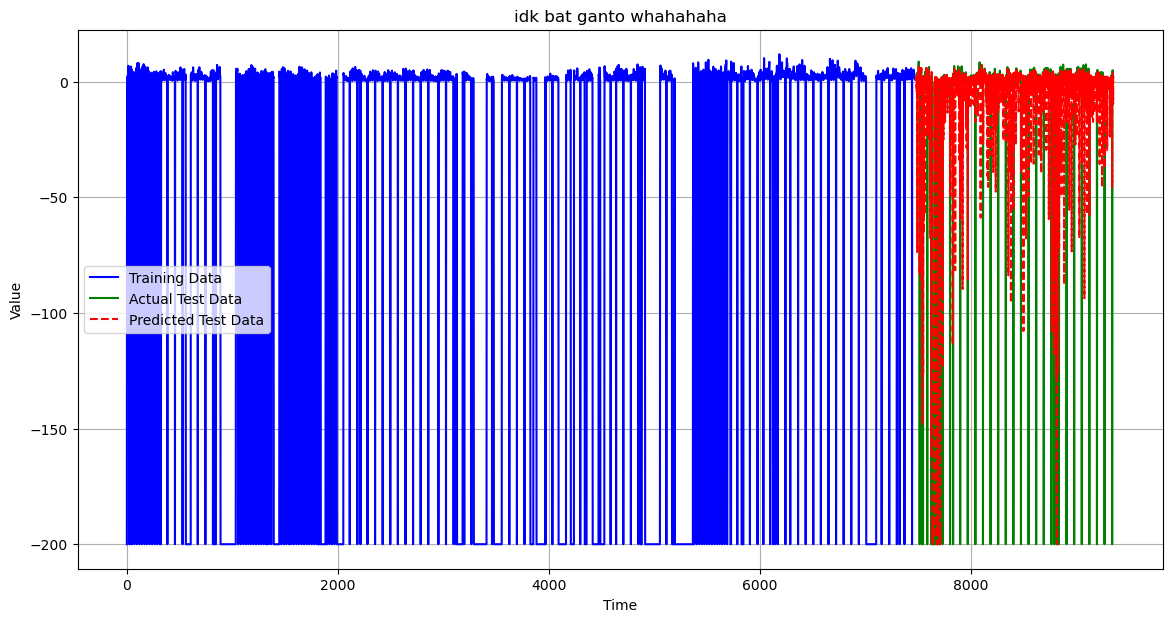

In [30]:
import matplotlib.pyplot as plt

# Create the time index for plotting
time_index_train = range(len(X_train))
time_index_test = range(len(X_train), len(X_train) + len(X_test))

# Plot the actual and predicted values
plt.figure(figsize=(14, 7))
plt.plot(time_index_train, y_train, label='Training Data', color='blue')
plt.plot(time_index_test, y_test, label='Actual Test Data', color='green')
plt.plot(time_index_test, y_pred, label='Predicted Test Data', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('idk bat ganto whahahaha')
plt.legend()
plt.grid(True)

# Show plot
plt.show()